# Wade with broken limbs

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `NO3_rise = na.approx(NO3_norm, x = q_norm, na.rm = FALSE)`.
Caused by warning in `regularize.values()`:
! collapsing to unique 'x' values”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `NO3_fall = na.approx(NO3_norm, x = q_norm, na.rm = FALSE)`.
Caused by warning in `regularize.values()`:
! collapsing to unique 'x' values”
Warning message in left_join(hyst_rise_interp, hyst_fall_interp, by = "q_norm"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 283 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence
  this warning.”
Warning message:
“Removed 270 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 270 rows containing missing values (`geom_line()`).”


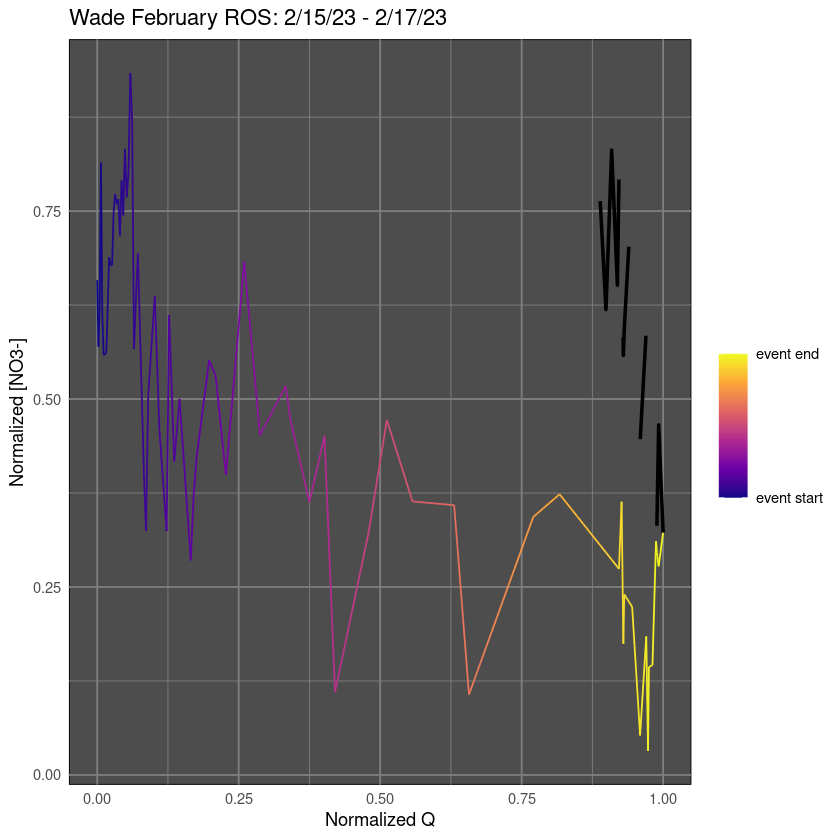

In [3]:
library(tidyverse)
library(lubridate)
library(data.table)
library(zoo)
library(ggplot2)
library(viridis)

# Specify the event start and end times
event_start <- as.POSIXct("2023-02-14 10:00:00")
event_end <- as.POSIXct("2023-02-17 00:00:00")

# Directory to save plots
output_dir <- "hysteresis_plots"
dir.create(output_dir, showWarnings = FALSE)

# Load chemistry and discharge data
wb_chem_q <- read.csv("data/wb_q_chem.csv")
wb_chem_q$datetime <- as.POSIXct(wb_chem_q$datetime, format = "%Y-%m-%dT%H:%M:%SZ")

# Filter for the specified event
event_data <- wb_chem_q %>%
  filter(datetime >= event_start & datetime <= event_end) %>%
  filter(!is.na(NO3) & !is.na(q_cms_wb))  # Remove rows with missing NO3 or q

# Normalize function
normalize <- function(x) (x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE))

# Rising limb
hyst_rise <- event_data %>%
  mutate(q_norm = normalize(q_cms_wb), NO3_norm = normalize(NO3)) %>%
  arrange(datetime) %>%
  slice(1:which.max(q_cms_wb))

# Falling limb
hyst_fall <- event_data %>%
  mutate(q_norm = normalize(q_cms_wb), NO3_norm = normalize(NO3)) %>%
  arrange(datetime) %>%
  slice(which.max(q_cms_wb):n())

# Create a sequence for interpolation
q_step <- tibble(q_norm = seq(0, 1, length.out = 100))

# Interpolate for rising limb
hyst_rise_interp <- hyst_rise %>%
  complete(q_norm = q_step$q_norm) %>%
  mutate(NO3_rise = na.approx(NO3_norm, x = q_norm, na.rm = FALSE))

# Interpolate for falling limb
hyst_fall_interp <- hyst_fall %>%
  complete(q_norm = q_step$q_norm) %>%
  mutate(NO3_fall = na.approx(NO3_norm, x = q_norm, na.rm = FALSE))

# Combine rising and falling limbs with datetime for color
hysteresis <- left_join(hyst_rise_interp, hyst_fall_interp, by = "q_norm") %>%
  mutate(datetime = event_start + q_norm * as.numeric(difftime(event_end, event_start, units = "secs")))

# Plot the hysteresis loop
plot <- ggplot(hysteresis, aes(x = q_norm)) +
  geom_line(aes(y = NO3_rise, color = datetime)) +  # Rising limb
  geom_line(aes(y = NO3_fall), linewidth = 1) +  # Falling limb
  scale_color_viridis_c(
    option = "C",
    name = "",
    breaks = range(hysteresis$datetime, na.rm = TRUE),
    labels = c("event start", "event end")
  ) +
  labs(
    title = "Wade February ROS: 2/15/23 - 2/17/23",
    x = "Normalized Q",
    y = "Normalized [NO3-]"
  ) +
  theme_minimal() +
  theme(
    panel.background = element_rect(fill = "grey30"),
    panel.grid = element_line(color = "grey50")
  )

# Save the plot
ggsave(
  filename = file.path(output_dir, "wb_NO3_hysteresis_EventA2.png"),
  plot = plot,
  width = 8,
  height = 4,
  dpi = 300
)

plot

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `NO3_rise = na.approx(NO3_norm, x = q_norm, na.rm = FALSE)`.
Caused by warning in `regularize.values()`:
! collapsing to unique 'x' values”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `NO3_fall = na.approx(NO3_norm, x = q_norm, na.rm = FALSE)`.
Caused by warning in `regularize.values()`:
! collapsing to unique 'x' values”
Warning message in left_join(hyst_rise_interp, hyst_fall_interp, by = "q_norm"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 304 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence
  this warning.”
Warning message:
“Removed 235 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 235 rows containing missing values (`geom_line()`).”


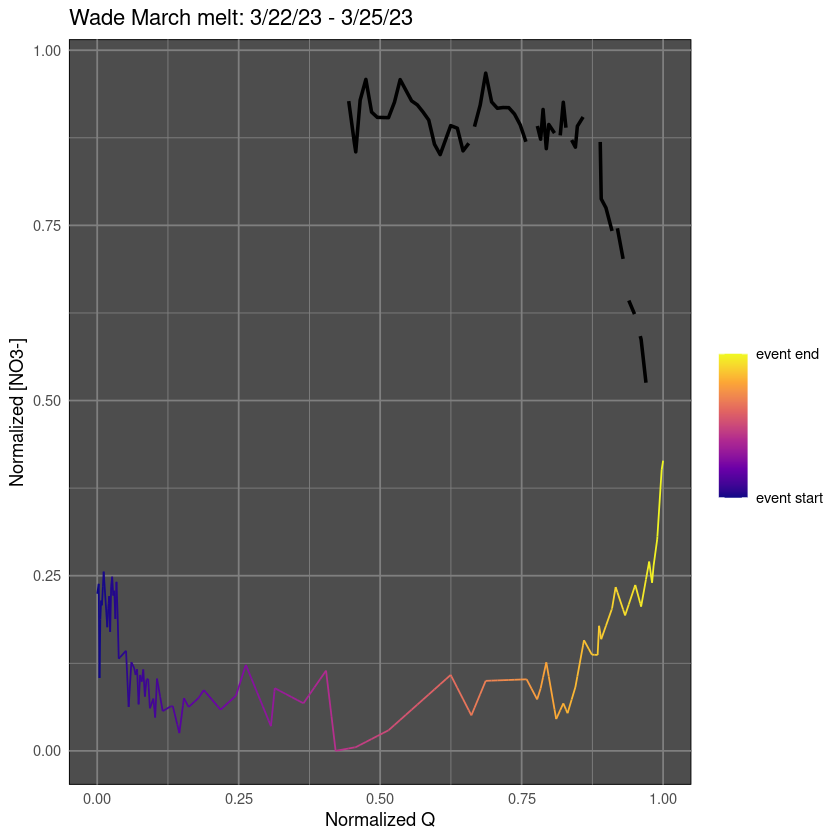

In [4]:
library(tidyverse)
library(lubridate)
library(data.table)
library(zoo)
library(ggplot2)
library(viridis)

# Specify the event start and end times
event_start <- as.POSIXct("2023-03-22 00:00:00")
event_end <- as.POSIXct("2023-03-25 00:00:00")

# Directory to save plots
output_dir <- "hysteresis_plots"
dir.create(output_dir, showWarnings = FALSE)

# Load chemistry and discharge data
wb_chem_q <- read.csv("data/wb_q_chem.csv")
wb_chem_q$datetime <- as.POSIXct(wb_chem_q$datetime, format = "%Y-%m-%dT%H:%M:%SZ")

# Filter for the specified event
event_data <- wb_chem_q %>%
  filter(datetime >= event_start & datetime <= event_end) %>%
  filter(!is.na(NO3) & !is.na(q_cms_wb))  # Remove rows with missing NO3 or q

# Normalize function
normalize <- function(x) (x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE))

# Rising limb
hyst_rise <- event_data %>%
  mutate(q_norm = normalize(q_cms_wb), NO3_norm = normalize(NO3)) %>%
  arrange(datetime) %>%
  slice(1:which.max(q_cms_wb))

# Falling limb
hyst_fall <- event_data %>%
  mutate(q_norm = normalize(q_cms_wb), NO3_norm = normalize(NO3)) %>%
  arrange(datetime) %>%
  slice(which.max(q_cms_wb):n())

# Create a sequence for interpolation
q_step <- tibble(q_norm = seq(0, 1, length.out = 100))

# Interpolate for rising limb
hyst_rise_interp <- hyst_rise %>%
  complete(q_norm = q_step$q_norm) %>%
  mutate(NO3_rise = na.approx(NO3_norm, x = q_norm, na.rm = FALSE))

# Interpolate for falling limb
hyst_fall_interp <- hyst_fall %>%
  complete(q_norm = q_step$q_norm) %>%
  mutate(NO3_fall = na.approx(NO3_norm, x = q_norm, na.rm = FALSE))

# Combine rising and falling limbs with datetime for color
hysteresis <- left_join(hyst_rise_interp, hyst_fall_interp, by = "q_norm") %>%
  mutate(datetime = event_start + q_norm * as.numeric(difftime(event_end, event_start, units = "secs")))

# Plot the hysteresis loop
plot <- ggplot(hysteresis, aes(x = q_norm)) +
  geom_line(aes(y = NO3_rise, color = datetime)) +  # Rising limb
  geom_line(aes(y = NO3_fall), linewidth = 1) +  # Falling limb
  scale_color_viridis_c(
    option = "C",
    name = "",
    breaks = range(hysteresis$datetime, na.rm = TRUE),
    labels = c("event start", "event end")
  ) +
  labs(
    title = "Wade March melt: 3/22/23 - 3/25/23",
    x = "Normalized Q",
    y = "Normalized [NO3-]"
  ) +
  theme_minimal() +
  theme(
    panel.background = element_rect(fill = "grey30"),
    panel.grid = element_line(color = "grey50")
  )

# Save the plot
ggsave(
  filename = file.path(output_dir, "wb_NO3_hysteresis_EventC.png"),
  plot = plot,
  width = 8,
  height = 4,
  dpi = 300
)

plot

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `NO3_rise = na.approx(NO3_norm, x = q_norm, na.rm = FALSE)`.
Caused by warning in `regularize.values()`:
! collapsing to unique 'x' values”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `NO3_fall = na.approx(NO3_norm, x = q_norm, na.rm = FALSE)`.
Caused by warning in `regularize.values()`:
! collapsing to unique 'x' values”
Warning message:
“Removed 326 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 326 rows containing missing values (`geom_line()`).”


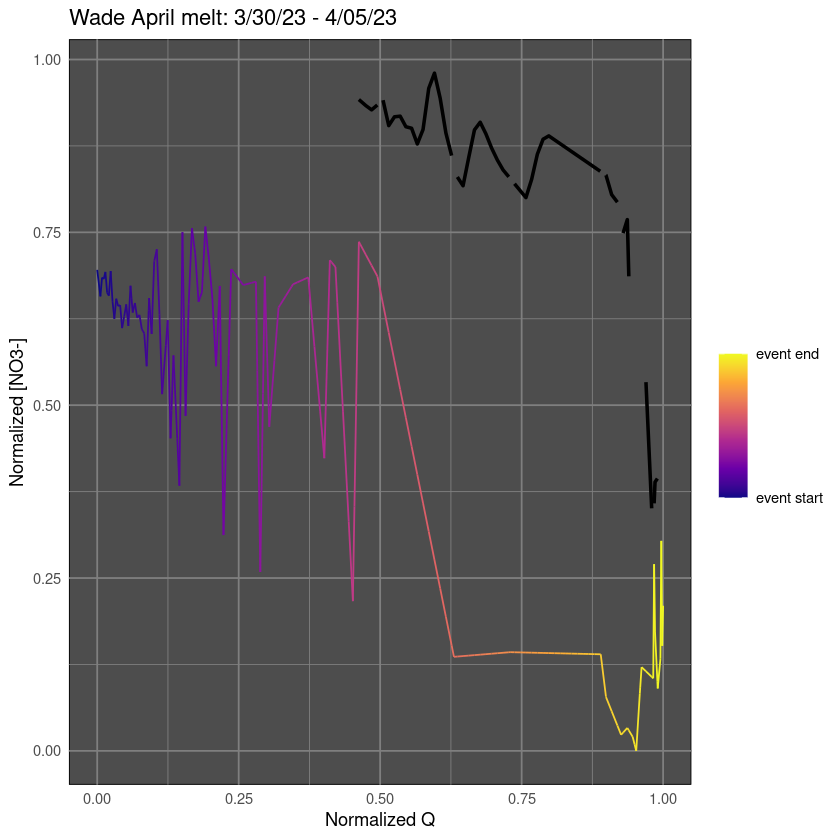

In [5]:
library(tidyverse)
library(lubridate)
library(data.table)
library(zoo)
library(ggplot2)
library(viridis)

# Specify the event start and end times
event_start <- as.POSIXct("2023-03-30 00:00:00")
event_end <- as.POSIXct("2023-04-03 00:00:00")

# Directory to save plots
output_dir <- "hysteresis_plots"
dir.create(output_dir, showWarnings = FALSE)

# Load chemistry and discharge data
wb_chem_q <- read.csv("data/wb_q_chem.csv")
wb_chem_q$datetime <- as.POSIXct(wb_chem_q$datetime, format = "%Y-%m-%dT%H:%M:%SZ")

# Filter for the specified event
event_data <- wb_chem_q %>%
  filter(datetime >= event_start & datetime <= event_end) %>%
  filter(!is.na(NO3) & !is.na(q_cms_wb))  # Remove rows with missing NO3 or q

# Normalize function
normalize <- function(x) (x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE))

# Rising limb
hyst_rise <- event_data %>%
  mutate(q_norm = normalize(q_cms_wb), NO3_norm = normalize(NO3)) %>%
  arrange(datetime) %>%
  slice(1:which.max(q_cms_wb))

# Falling limb
hyst_fall <- event_data %>%
  mutate(q_norm = normalize(q_cms_wb), NO3_norm = normalize(NO3)) %>%
  arrange(datetime) %>%
  slice(which.max(q_cms_wb):n())

# Create a sequence for interpolation
q_step <- tibble(q_norm = seq(0, 1, length.out = 100))

# Interpolate for rising limb
hyst_rise_interp <- hyst_rise %>%
  complete(q_norm = q_step$q_norm) %>%
  mutate(NO3_rise = na.approx(NO3_norm, x = q_norm, na.rm = FALSE))

# Interpolate for falling limb
hyst_fall_interp <- hyst_fall %>%
  complete(q_norm = q_step$q_norm) %>%
  mutate(NO3_fall = na.approx(NO3_norm, x = q_norm, na.rm = FALSE))

# Combine rising and falling limbs with datetime for color
hysteresis <- left_join(hyst_rise_interp, hyst_fall_interp, by = "q_norm") %>%
  mutate(datetime = event_start + q_norm * as.numeric(difftime(event_end, event_start, units = "secs")))

# Plot the hysteresis loop
plot <- ggplot(hysteresis, aes(x = q_norm)) +
  geom_line(aes(y = NO3_rise, color = datetime)) +  # Rising limb
  geom_line(aes(y = NO3_fall), linewidth = 1) +  # Falling limb
  scale_color_viridis_c(
    option = "C",
    name = "",
    breaks = range(hysteresis$datetime, na.rm = TRUE),
    labels = c("event start", "event end")
  ) +
  labs(
    title = "Wade April melt: 3/30/23 - 4/05/23",
    x = "Normalized Q",
    y = "Normalized [NO3-]"
  ) +
  theme_minimal() +
  theme(
    panel.background = element_rect(fill = "grey30"),
    panel.grid = element_line(color = "grey50")
  )

# Save the plot
ggsave(
  filename = file.path(output_dir, "wb_NO3_hysteresis_EventD1.png"),
  plot = plot,
  width = 8,
  height = 4,
  dpi = 300
)

plot

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `NO3_rise = na.approx(NO3_norm, x = q_norm, na.rm = FALSE)`.
Caused by warning in `regularize.values()`:
! collapsing to unique 'x' values”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `NO3_fall = na.approx(NO3_norm, x = q_norm, na.rm = FALSE)`.
Caused by warning in `regularize.values()`:
! collapsing to unique 'x' values”
Warning message in left_join(hyst_rise_interp, hyst_fall_interp, by = "q_norm"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 101 of `x` matches multiple rows in `y`.
ℹ Row 342 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence
  this warning.”
Warning message:
“Removed 12 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_line()`).”


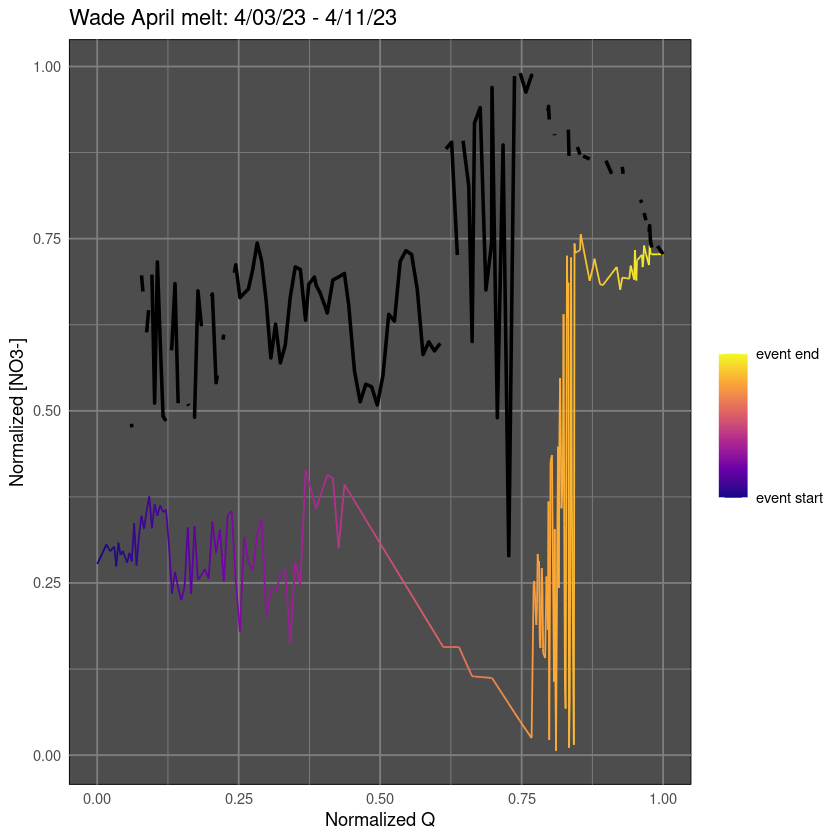

In [6]:
library(tidyverse)
library(lubridate)
library(data.table)
library(zoo)
library(ggplot2)
library(viridis)

# Specify the event start and end times
event_start <- as.POSIXct("2023-04-03 00:00:00")
event_end <- as.POSIXct("2023-04-11 00:00:00")

# Directory to save plots
output_dir <- "hysteresis_plots"
dir.create(output_dir, showWarnings = FALSE)

# Load chemistry and discharge data
wb_chem_q <- read.csv("data/wb_q_chem.csv")
wb_chem_q$datetime <- as.POSIXct(wb_chem_q$datetime, format = "%Y-%m-%dT%H:%M:%SZ")

# Filter for the specified event
event_data <- wb_chem_q %>%
  filter(datetime >= event_start & datetime <= event_end) %>%
  filter(!is.na(NO3) & !is.na(q_cms_wb))  # Remove rows with missing NO3 or q

# Normalize function
normalize <- function(x) (x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE))

# Rising limb
hyst_rise <- event_data %>%
  mutate(q_norm = normalize(q_cms_wb), NO3_norm = normalize(NO3)) %>%
  arrange(datetime) %>%
  slice(1:which.max(q_cms_wb))

# Falling limb
hyst_fall <- event_data %>%
  mutate(q_norm = normalize(q_cms_wb), NO3_norm = normalize(NO3)) %>%
  arrange(datetime) %>%
  slice(which.max(q_cms_wb):n())

# Create a sequence for interpolation
q_step <- tibble(q_norm = seq(0, 1, length.out = 100))

# Interpolate for rising limb
hyst_rise_interp <- hyst_rise %>%
  complete(q_norm = q_step$q_norm) %>%
  mutate(NO3_rise = na.approx(NO3_norm, x = q_norm, na.rm = FALSE))

# Interpolate for falling limb
hyst_fall_interp <- hyst_fall %>%
  complete(q_norm = q_step$q_norm) %>%
  mutate(NO3_fall = na.approx(NO3_norm, x = q_norm, na.rm = FALSE))

# Combine rising and falling limbs with datetime for color
hysteresis <- left_join(hyst_rise_interp, hyst_fall_interp, by = "q_norm") %>%
  mutate(datetime = event_start + q_norm * as.numeric(difftime(event_end, event_start, units = "secs")))

# Plot the hysteresis loop
plot <- ggplot(hysteresis, aes(x = q_norm)) +
  geom_line(aes(y = NO3_rise, color = datetime)) +  # Rising limb
  geom_line(aes(y = NO3_fall), linewidth = 1) +  # Falling limb
  scale_color_viridis_c(
    option = "C",
    name = "",
    breaks = range(hysteresis$datetime, na.rm = TRUE),
    labels = c("event start", "event end")
  ) +
  labs(
    title = "Wade April melt: 4/03/23 - 4/11/23",
    x = "Normalized Q",
    y = "Normalized [NO3-]"
  ) +
  theme_minimal() +
  theme(
    panel.background = element_rect(fill = "grey30"),
    panel.grid = element_line(color = "grey50")
  )

# Save the plot
ggsave(
  filename = file.path(output_dir, "wb_NO3_hysteresis_EventD2.png"),
  plot = plot,
  width = 8,
  height = 4,
  dpi = 300
)

plot

# Datetime but not working yet

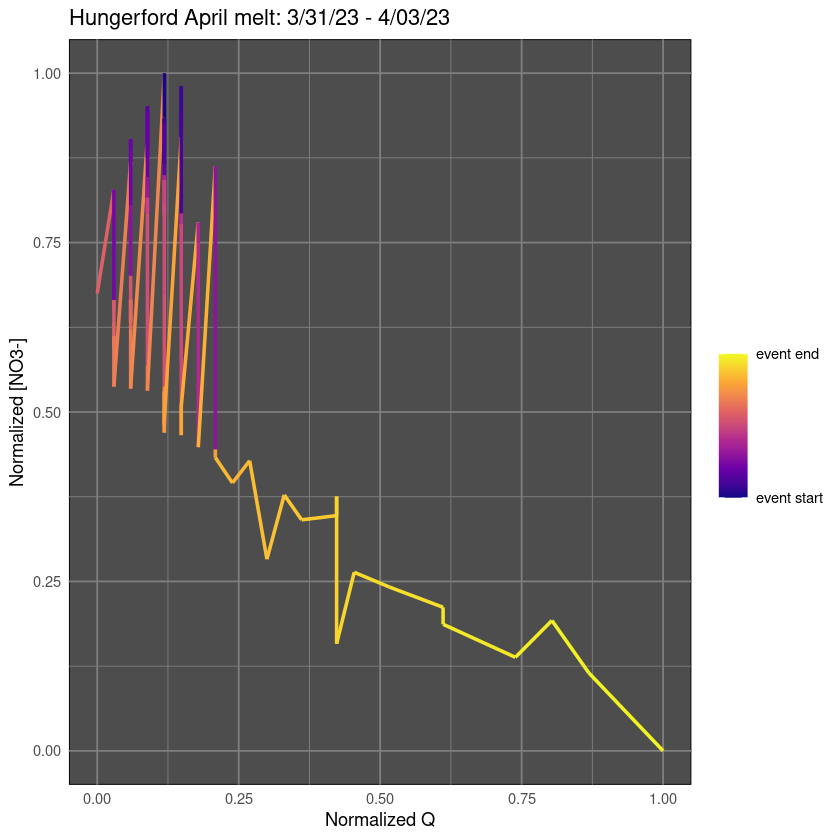

In [40]:
library(tidyverse)
library(lubridate)
library(data.table)
library(zoo)
library(ggplot2)
library(viridis)

# Specify the event start and end times
event_start <- as.POSIXct("2023-02-09 00:00:00")
event_end <- as.POSIXct("2023-02-10 00:00:00")

# Directory to save plots
output_dir <- "hysteresis_plots"
dir.create(output_dir, showWarnings = FALSE)

# Load chemistry and discharge data
hb_chem_q <- read.csv("data/hb_q_chem.csv")
hb_chem_q$datetime <- as.POSIXct(hb_chem_q$datetime, format = "%Y-%m-%dT%H:%M:%SZ")

# Filter for the specified event
event_data <- hb_chem_q %>%
  filter(datetime >= event_start & datetime <= event_end) %>%
  filter(!is.na(NO3) & !is.na(q_cms_hb))  # Remove rows with missing NO3 or q

# Normalize function
normalize <- function(x) (x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE))

# Rising limb
hyst_rise <- event_data %>%
  mutate(q_norm = normalize(q_cms_hb), NO3_norm = normalize(NO3)) %>%
  arrange(datetime) %>%
  slice(1:which.max(q_cms_hb)) %>%
  mutate(limb = "Rising")

# Falling limb
hyst_fall <- event_data %>%
  mutate(q_norm = normalize(q_cms_hb), NO3_norm = normalize(NO3)) %>%
  arrange(datetime) %>%
  slice(which.max(q_cms_hb):n()) %>%
  mutate(limb = "Falling")

# Combine rising and falling limbs
hysteresis <- bind_rows(hyst_rise, hyst_fall)

# Create the plot
plot <- ggplot(hysteresis, aes(x = q_norm, y = NO3_norm, color = datetime)) +
  geom_line(linewidth = 1) +  # Single line for both limbs
  scale_color_viridis_c(
    option = "C",
    name = "",
    breaks = range(hysteresis$datetime, na.rm = TRUE),
    labels = c("event start", "event end")
  ) +
  labs(
    title = "Hungerford April melt: 3/31/23 - 4/03/23",
    x = "Normalized Q",
    y = "Normalized [NO3-]"
  ) +
  theme_minimal() +
  theme(
    panel.background = element_rect(fill = "grey30"),
    panel.grid = element_line(color = "grey50")
  )

# Save the plot
ggsave(
  filename = file.path(output_dir, "HB_NO3_hysteresis_EventD1.png"),
  plot = plot,
  width = 8,
  height = 4,
  dpi = 300
)

plot